In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split

In [13]:
boston = datasets.load_boston()

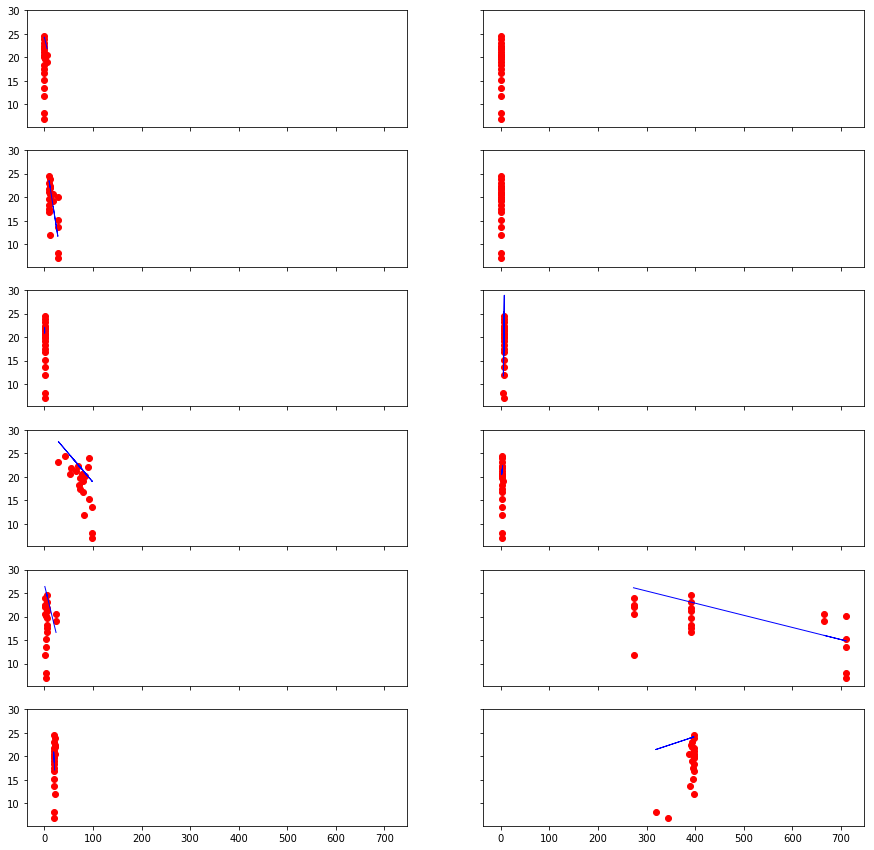

In [14]:
f, axarr = plt.subplots(6,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,6):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        
        regr = linm.LinearRegression()
        
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()

In [15]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

In [16]:
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318208
  wl1=3260.703769182654
  wl2=1274.171756925127
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392587
  wl1=1511.0823340013712
  wl2=589.1449165292609
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


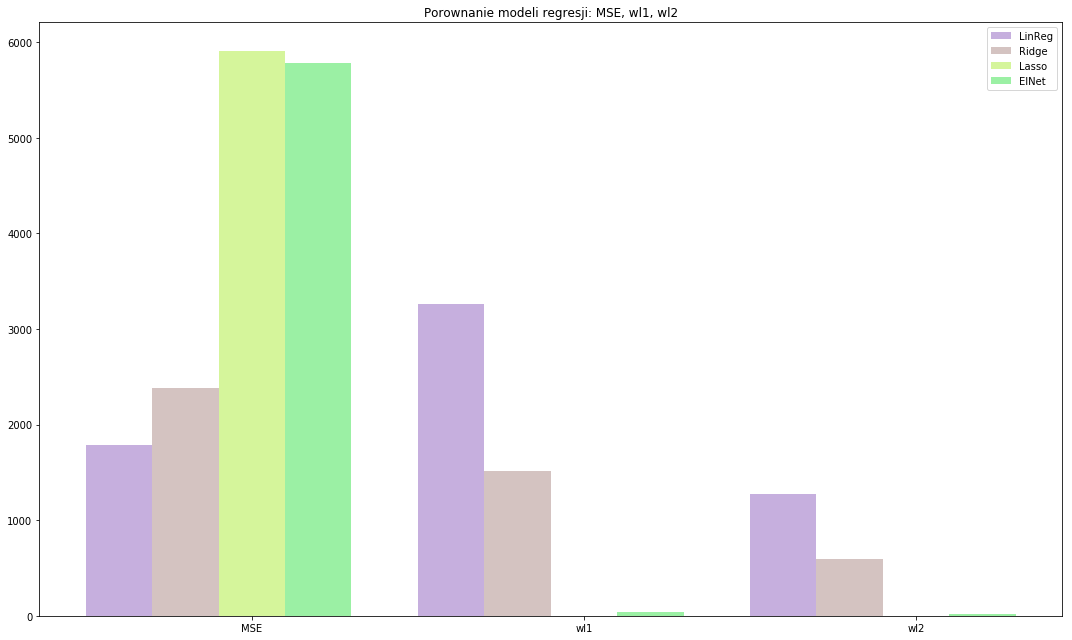

In [17]:
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

In [19]:
malzenstwa = pd.read_csv('malzenstwa.csv', sep=';', encoding='iso-8859-1')

In [20]:
ludnosc = malzenstwa.ludnosc
malzenstwa_count = malzenstwa.malzenstwa

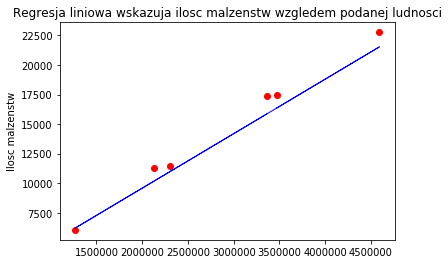

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(ludnosc, malzenstwa_count, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja ilosc malzenstw wzgledem podanej ludnosci')
plt.ylabel('Ilosc malzenstw')
plt.show()

In [22]:
wydatki_df = pd.read_csv('wydatki.csv', sep=',', encoding='iso-8859-1')
dochody = wydatki_df.Dochody
wydatki = wydatki_df.Wydatki

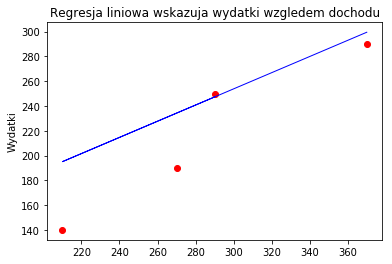

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(dochody, wydatki, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja wydatki wzgledem dochodu')
plt.ylabel('Wydatki')
plt.show()

In [24]:
random_array = np.random.uniform(0,1, size=(2, 100))

In [25]:
print('Średnie x oraz y')
x_sr = random_array[0,:].mean()
print(x_sr)
y_sr = random_array[1,:].mean()
print(y_sr)

Średnie x oraz y
0.43985141704268654
0.5314049033865352


In [26]:
print('Odjęte wartości średnich od x oraz y')
x_minus_x_sr = np.array([x - x_sr for x in random_array[0,:]])
y_minus_y_sr = np.array([y - y_sr for y in random_array[1,:]])

Odjęte wartości średnich od x oraz y


In [27]:
print('Kwadrat powyższych wartości')
x_minus_x_sr_square = np.square(x_minus_x_sr)
y_minus_y_sr_square = np.square(y_minus_y_sr)

Kwadrat powyższych wartości


In [28]:
product = x_minus_x_sr_square * y_minus_y_sr_square

In [29]:
result_df = pd.DataFrame(data = {'x' : random_array[0,:], 'y' : random_array[1, :], 'x-x_sr': x_minus_x_sr, 
                                 'y-y_sr': y_minus_y_sr, '(x-x_sr)^2': x_minus_x_sr_square,'(y-y_sr)^2': y_minus_y_sr_square,
                                  '(x-x_sr) * (y-y_sr)' : product})

In [30]:
print(x_sr)
print(y_sr)
result_df

0.43985141704268654
0.5314049033865352


,x,y,x-x_sr,y-y_sr,(x-x_sr)^2,(y-y_sr)^2,(x-x_sr) * (y-y_sr)
0,0.430969,0.894607,-0.008882,0.363202,0.000079,0.131916,1.040706e-05
1,0.243673,0.819717,-0.196179,0.288312,0.038486,0.083124,3.199108e-03
2,0.065619,0.549045,-0.374233,0.017640,0.140050,0.000311,4.357962e-05
3,0.263063,0.429920,-0.176789,-0.101485,0.031254,0.010299,3.218932e-04
4,0.490787,0.792652,0.050936,0.261247,0.002594,0.068250,1.770724e-04
5,0.432685,0.932824,-0.007167,0.401420,0.000051,0.161138,8.275844e-06
6,0.213320,0.623868,-0.226531,0.092463,0.051317,0.008549,4.387259e-04
7,0.040109,0.406828,-0.399742,-0.124577,0.159794,0.015519,2.479905e-03
8,0.085320,0.627086,-0.354531,0.095681,0.125692,0.009155,1.150708e-03
9,0.647681,0.123717,0.207829,-0.407688,0.043193,0.166209,7.179061e-03


In [31]:
a = result_df['(x-x_sr) * (y-y_sr)'].sum() / result_df['(x-x_sr)^2'].sum()

In [32]:
a

0.07722194702215447

In [33]:
b = y_sr - a * x_sr

In [34]:
b

0.4974387205620453

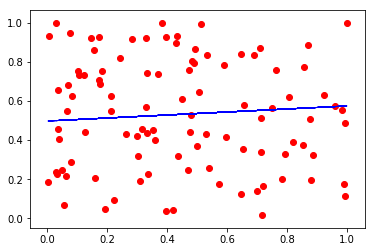

In [35]:
plt.scatter(random_array[0,:], random_array[1,:],  color='red')
plt.plot(random_array[0,:], a * random_array[0,:] + b, color='blue', linewidth=1)
plt.show()